In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

# These are the dates for the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Calling the function saving and printing the results
year = calc_temps(start_date, end_date)
print(year)

[(72.0, 79.25, 83.0)]


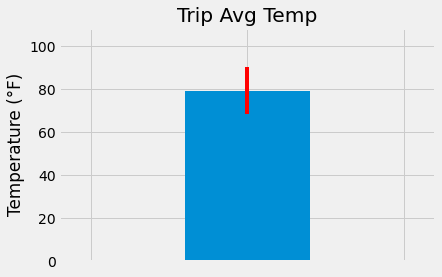

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.title('Trip Avg Temp')
plt.ylabel('Temperature (°F)')
plt.xticks([0,1,2], "")
plt.margins(x=1, y=0.2)
plt.bar(1, year[0][1])
plt.errorbar(1, year[0][1], yerr=year[0][2]-year[0][0], ecolor='red')

plt.show()

### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Changing dates to previous year values
trip_start = start_date
year = int(trip_start[0:4])
year += 1
trip_start = str(year)+start_date[4:10]

trip_end = end_date
year = int(trip_end[0:4])
year += 1
trip_end = str(year)+end_date[4:10]

trip_stats = session.query(Measurement.station, Measurement.date, func.sum(Measurement.prcp))\
.order_by(Measurement.prcp.desc())\
.group_by(Measurement.station,
          Measurement.date)\
.filter(Measurement.date >= start_date,
       Measurement.date <= end_date)

for _ in trip_stats:
    print(_)

('USC00516128', '2017-08-02', 0.25)
('USC00514830', '2017-08-01', 0.12)
('USC00516128', '2017-08-03', 0.06)
('USC00519281', '2017-08-05', 0.06)
('USC00514830', '2017-08-02', 0.05)
('USC00516128', '2017-08-07', 0.05)
('USC00514830', '2017-08-04', 0.04)
('USC00519397', '2017-08-01', 0.02)
('USC00519397', '2017-08-04', 0.02)
('USC00514830', '2017-08-03', 0.01)
('USC00514830', '2017-08-06', 0.0)
('USC00514830', '2017-08-07', 0.0)
('USC00519281', '2017-08-04', 0.0)
('USC00519281', '2017-08-06', 0.0)
('USC00519397', '2017-08-02', 0.0)
('USC00519397', '2017-08-03', 0.0)
('USC00519397', '2017-08-05', 0.0)
('USC00519397', '2017-08-06', 0.0)
('USC00519397', '2017-08-07', 0.0)
('USC00519523', '2017-08-01', 0.0)
('USC00519523', '2017-08-02', 0.0)
('USC00519523', '2017-08-03', 0.0)
('USC00519523', '2017-08-04', 0.0)
('USC00519523', '2017-08-06', 0.0)
('USC00519523', '2017-08-07', 0.0)
('USC00516128', '2017-08-01', None)
('USC00516128', '2017-08-05', None)
('USC00516128', '2017-08-06', None)


In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates

# Changing strings to timedate
start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')

# Creting the date range
delta = dt.timedelta(days=1)
date_range = []
while start_date <= end_date:
    date_range.append(start_date)
    start_date += delta

# Strip off the year and save a list of strings in the format %m-%d
trip_dates = []
for _ in date_range:
    trip_dates.append(dt.datetime.strftime(_, '%m-%d'))


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = []
for _ in trip_dates:
    normals.append(daily_normals(_))

normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [15]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# Initializing lists
min_temp = []
avg_temp = []
max_temp = []


# Unpacking the results
for _ in normals:
    min_temp.append(_[0][0])
    avg_temp.append(_[0][1])
    max_temp.append(_[0][2])

# Creating dictionaries for the dataframe
trip_df = pd.DataFrame({'date': trip_dates, 'min': min_temp, 'avg': avg_temp, 'max': max_temp}).set_index('date')

trip_df


,min,avg,max
date,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


<AxesSubplot:title={'center':'Normal Temperatures for date range'}, xlabel='date'>

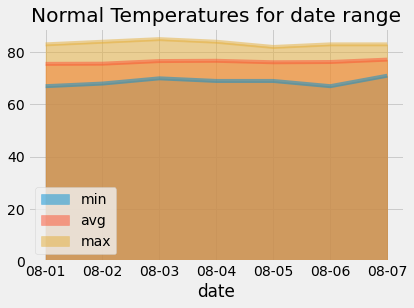

In [19]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot.area(stacked=False, title = 'Normal Temperatures for date range')

## Close Session

In [17]:
session.close()